In [2]:
# use matplotlib and seaborn for plotting
# numpy to handle numerical arrays
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

# Visualizing unsupervised datasets

In [6]:
# fetch the data using sklearn datasets and we have an array of pixel values and another array of targets
data = datasets.fetch_openml('mnist_784',
                            version=1,
                            return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [7]:
# 70000 images, with 28 * 28 --> flattened, so 784
print(pixel_values.shape)

(70000, 784)


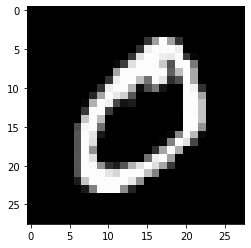

In [10]:
single_image = pixel_values[1, :].reshape(28,28)
plt.imshow(single_image, cmap = 'gray')

In [15]:
# TSNE for starting 3000 images 
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])
# taking only the first two components of TSNE for visualzing 
print(transformed_data.shape)
# adding target column as the actual labels are present
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), 
                      columns = ["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df.head()

(3000, 2)


/Users/Paritosh_Gupta/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


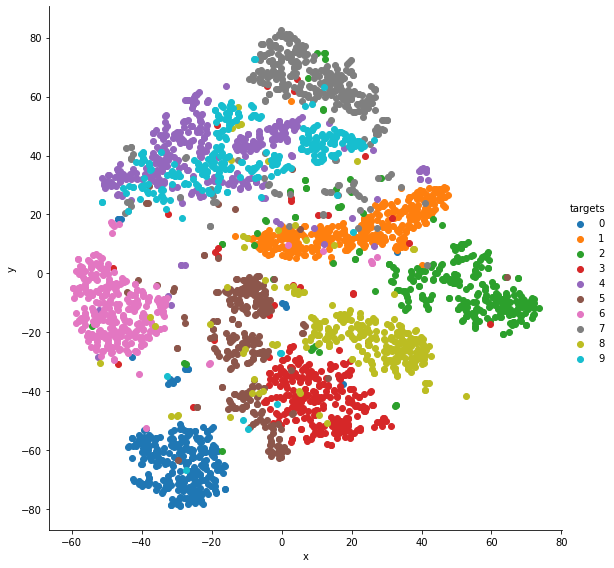

In [17]:
grid = sns.FacetGrid(tsne_df, hue="targets", size = 8)
grid.map(plt.scatter, "x", "y").add_legend()

# Cross Validation

## wine quality data

In [76]:
import pandas as pd
import os
print(os.listdir())
df = pd.read_csv("winequality-red.csv")
df

['.DS_Store', 'winequality-red.csv', '.ipynb_checkpoints', '1_supervised_vs_unsupervised_learning.ipynb']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [77]:
quality_mapping = {
      3: 0, 
      4: 1,
      5: 2,
      6: 3,
      7: 4,
      8: 5
}
# map function to convert the values in a column to mapped values passed in dict
df.loc[:, "quality"] = df.quality.map(quality_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


## train test split

In [83]:
# use sample with frac=1 to shuffle the dataframe
# reset the indices after shuffling as they change
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 for testing/validation
df_test = df.tail(599)

## decision tree classifier

In [84]:
from sklearn import tree
from sklearn import metrics

# initialize the decision tree classifier
# max  depth is 3 and other parameters are kept as default
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features of the model 
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)


# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate the predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)


print(f"Training Accuracy --> {train_accuracy}")
print(f"Test Accuracy --> {test_accuracy}")

Training Accuracy --> 0.576
Test Accuracy --> 0.5191986644407346


## train test accuracy plot against max_depth parameter

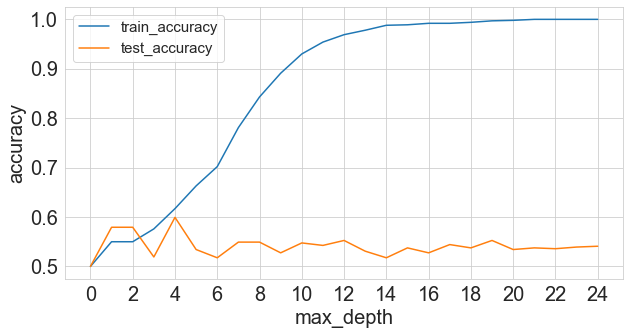

In [96]:
# model accuracy with different max_depth

from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text on the plots
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

# ensures the plot is displayed within the notebook
%matplotlib inline

# initialize list to store accuracies for train and test data
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values

for depth in range(1,25):
    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    
    # train the model on the provided features and mapped quality from before
    clf.fit(df_train[cols], df_train.quality)


    # generate predictions on the training set
    train_predictions = clf.predict(df_train[cols])

    # generate the predictions on the test set
    test_predictions = clf.predict(df_test[cols])

    # calculate the accuracy of predictions on training data set
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

    # calculate the accuracy of predictions on test data set
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# create two plots using matplotlib and seaborn

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train_accuracy")
plt.plot(test_accuracies, label="test_accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0,26, 2))
plt.xlabel("max_depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()


# best test score is at max_depth = 4 
# beyond which the test accuracy remains same or get worse,
# meaning model is learning more on train)_data and IS OVERFITTING 
# model fits perfectly on the training data but doesn't generalize on test data

# WHEN THE TEST LOSS INCREASES AS WE KEEP IMPROVING TRAINING LOSS - very common in NN

# WE MUST STOP TRAINING THE MODEL WHEN THE VALIDATION LOSS INCREASES

## cross validation codes

In [ ]:
# K fold cross validation

from sklearn import model_selection
if __name__=="__main__":
    df = pd.read_csv("sample.csv")
    
    df["kfold"] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)
     kf = model_selection.KFold(n_splits = 5)
        for fold, (train_, valid_) in kf.split(X=df):
            df.loc[valid_, 'kfold'] = fold
            
    df.to_csv("train_folds.csv", index=False)
    

# K fold cross validation
from sklearn import model_selection
if __name__=="__main__":
    df = pd.read_csv("sample.csv")
    
    df["kfold"] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    y = df.target.values
    kf = model_selection.StratifiedKFold(n_splits = 5)
        # need to pass target column
        for fold, (train_, valid_) in kf.split(X=df, y=y):
            df.loc[valid_, 'kfold'] = fold
            
    df.to_csv("train_folds.csv", index=False)

Text(0, 0.5, 'quality')

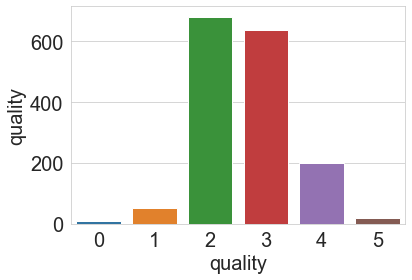

In [98]:
b = sns.countplot(x='quality', data = df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("quality", fontsize=20)

In [110]:
# stratified k fold for regression 
from sklearn import model_selection

def create_folds(data):
    
    data["kfold"] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    
    num_bins = int(np.floor(1+ np.log2(len(data))))
    
    data.loc[:, "bins"] = pd.cut(data["target"], bins = num_bins, labels=False)
    
    kf = model_selection.StratifiedKFold(n_splits = 5)
    
    for fold, (train_, valid_) in enumerate(kf.split(X=data, y = data.bins.values)):
        data.loc[valid_, 'kfold'] = fold
        
    return data

In [111]:
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

df = pd.DataFrame(X, columns = [f"f_{i}" for i in range(X.shape[1])])
df.loc[:, "target"] = y
df
df = create_folds(df)

In [112]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold,bins
0,-0.190889,0.210628,-1.461199,0.049812,-1.954462,0.545461,0.492515,0.709370,-1.834811,1.689908,...,1.475339,0.408029,0.491817,0.212577,0.684718,-0.090635,-0.776128,-172.247206,0,5
1,-0.032788,-1.133858,-0.528832,0.558601,0.240710,-1.594879,-3.077855,-0.186862,1.661177,-0.822084,...,1.098850,0.349637,-0.658795,0.240860,-0.217084,-0.327598,0.533939,-164.124841,0,5
2,-1.399375,-0.460846,-0.806095,-0.376608,1.072717,0.401919,0.952232,1.874313,0.151374,1.247566,...,0.260007,0.818100,0.632372,-1.765214,0.726939,0.528841,0.869628,153.231043,0,8
3,-1.572396,-2.324581,0.382260,-0.365339,1.007606,2.145088,1.436871,0.627849,-1.061979,0.469857,...,-0.943919,-1.379165,-0.406179,0.914680,-0.781308,0.088842,-0.079466,460.450243,0,11
4,0.691296,0.158244,0.711503,1.105642,0.083795,-0.369958,-0.608993,0.620779,-0.714883,0.101683,...,-0.032733,0.472296,-0.973637,-0.718275,0.203224,-0.273373,-0.335201,-335.351390,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-1.098851,-0.427647,-1.739954,-0.291089,-1.820031,1.847322,-0.269841,1.206007,-0.002407,0.583584,...,2.394745,-2.189765,0.449516,0.542540,1.234818,-0.771177,1.427350,-348.077317,4,4
14996,0.278579,0.475539,-0.227241,1.014183,-1.848513,-2.090376,-0.594111,0.148105,0.342483,0.851336,...,-0.546755,0.336949,-0.662356,-0.437716,1.310487,-1.281753,-2.082394,161.099811,4,8
14997,-0.518958,0.966490,0.313736,-0.023635,0.427800,1.438455,-0.344485,-0.493882,-0.840014,-0.675943,...,1.487200,0.594732,1.009269,1.906069,0.173518,0.813423,-0.419380,14.384481,4,7
14998,-0.024906,-0.234757,0.618159,-0.035974,-0.868943,-0.243830,-0.711287,0.603487,-0.898224,0.080056,...,0.951832,0.345801,1.045218,-0.814217,-0.193040,-0.120677,2.746343,286.778734,4,9


# Evaluation Metrics

## Classifier metrics udf - binary and multi class classification

In [119]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy_score
    """
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter/len(y_true)

from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
print(f"Accuracy using sklearn  --> {metrics.accuracy_score(l1, l2)}")
print(f"Accuracy using UDF --> {accuracy(l1, l2)}")

Accuracy using sklearn  --> 0.625
Accuracy using UDF --> 0.625


################## binary class metrics ##################
Accuracy using sklearn  --> 0.625
Accuracy using UDF --> 0.625
True Positive --> 2
True Negative --> 3
False Positive --> 1
False Negative --> 2
Accuracy using UDF --> 0.625
Precision using UDF --> 0.6666666666666666
Recall using UDF --> 0.5
F1 Score using UDF --> 0.5714285714285715
TPR Score using UDF --> 0.5
FPR Score using UDF --> 0.25
Log Loss using UDF  --> 0.49882711861432294
Log Loss using scikit learn  --> 0.49882711861432294
0.8300000000000001


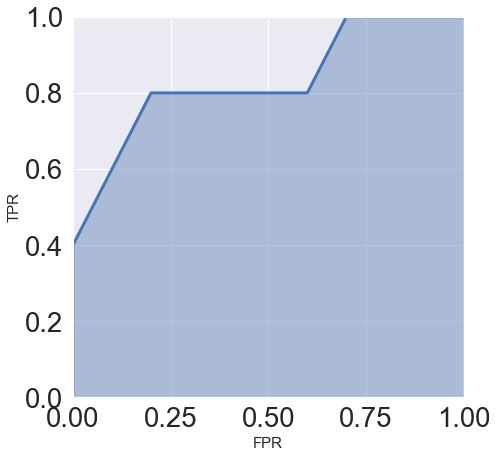

################## multi class metrics ##################
Macro Precision using UDF  --> 0.3611111111111111
Macro Precision using scikit learn  --> 0.3611111111111111
Micro Precision using scikit learn  --> 0.4444444444444444
Weighted Precision using UDF  --> 0.39814814814814814
Weighted Precision using scikit learn  --> 0.39814814814814814
Weighted F1 Score using UDF  --> 0.41269841269841273
Weighted Precision using scikit learn  --> 0.41269841269841273
################## Confusion Matrix##################


In [182]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]


def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy_score
    """
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter/len(y_true)

def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt ==1 and yp==1:
            tp +=1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt ==0 and yp==0:
            tn +=1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1 
            
    return fp
            
def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1 
    return fn

def accuracy_score_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    accuracy = (tp + tn)/(tp + tn + fn + fp)
    
    return accuracy


def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp+fp)
    return precision

def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp/ (tp+fn)
    return recall

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1 = 2 * p * r / (p + r)
    
    return f1

def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp/(fp + tn)

def accuracy_score_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    accuracy = (tp + tn)/(tp + tn + fn + fp)
    
    return accuracy

def log_loss(y_true, y_proba):
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilites
    epsilon = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # caclculate loss for one sample
        temp_loss = -1.0 * (yt*np.log(yp) + (1-yt) * np.log(1-yp))
        loss.append(temp_loss)
        
    return np.mean(loss)

def macro_precision(y_true, y_pred):
    
    num_classes = len(np.unique(y_true))
    precision = 0
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp / (tp + fp)
        
        precision += temp_precision

    precision /= num_classes
    
    return precision

def micro_precision(y_true, y_pred):
    tp = 0
    fp = 0
    num_classes = len(np.unique(y_true))
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
          
        # calculate current class true positive and update overall
        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)
        
    precision = tp / (tp + fp)
    
    return precision

from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    
    # initialize precision to 0
    precision = 0 
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        temp_precision = tp / (tp + fp)
        
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        
        # add to overall precision
        precision += weighted_precision
        
    # calculate overall precision by dividing by total number of samples
    overall_precision = precision/ len(y_true)
    
    return overall_precision

def weighted_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    
    f1 = 0
    for class_ in range(num_classes):
        temp_true =[1 if p == class_ else 0 for p in y_true]
        temp_pred =[1 if p == class_ else 0 for p in y_pred]
        
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        
        # calculate f1 of class
        if p + r !=0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
            
        weighted_f1 = class_counts[class_] * temp_f1
        
        f1 += weighted_f1
        
    overall_f1 = f1/len(y_true)
    
    return overall_f1

##################### Inputs ############################
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
tpr_list = []
fpr_list = []
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1.0]

################ Binary ################################
print("################## binary class metrics ##################")
from sklearn import metrics
print(f"Accuracy using sklearn  --> {metrics.accuracy_score(l1, l2)}")
print(f"Accuracy using UDF --> {accuracy(l1, l2)}")
print(f"True Positive --> {true_positive(l1, l2)}")
print(f"True Negative --> {true_negative(l1, l2)}")      
print(f"False Positive --> {false_positive(l1, l2)}")      
print(f"False Negative --> {false_negative(l1, l2)}")      
print(f"Accuracy using UDF --> {accuracy_score_v2(l1, l2)}")      
print(f"Precision using UDF --> {precision(l1, l2)}")      
print(f"Recall using UDF --> {recall(l1, l2)}")      
print(f"F1 Score using UDF --> {f1(l1, l2)}")
print(f"TPR Score using UDF --> {tpr(l1, l2)}")
print(f"FPR Score using UDF --> {fpr(l1, l2)}")
print(f"Log Loss using UDF  --> {log_loss(y_true, y_proba)}")
print(f"Log Loss using scikit learn  --> {metrics.log_loss(y_true, y_proba)}")
print(metrics.roc_auc_score(y_true, y_pred))

for thresh in thresholds:
    temp_pred = [1 if x>= thresh else 0 for x in y_pred]
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)
    
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha = 0.4)
plt.plot(fpr_list, tpr_list, lw = 3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

################## multi class metrics ##################
from sklearn import metrics
print("################## multi class metrics ##################")
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

from sklearn import metrics
print(f"Macro Precision using UDF  --> {macro_precision(y_true, y_pred)}")
print(f"Macro Precision using scikit learn  --> {metrics.precision_score(y_true, y_pred, average = 'macro')}")
# print(f"Micro Precision using UDF  --> {micro_precision(y_true, y_pred)}")
print(f"Micro Precision using scikit learn  --> {metrics.precision_score(y_true, y_pred, average = 'micro')}")
print(f"Weighted Precision using UDF  --> {weighted_precision(y_true, y_pred)}")
print(f"Weighted Precision using scikit learn  --> {metrics.precision_score(y_true, y_pred, average = 'weighted')}")
print(f"Weighted F1 Score using UDF  --> {weighted_f1(y_true, y_pred)}")
print(f"Weighted Precision using scikit learn  --> {metrics.f1_score(y_true, y_pred, average = 'weighted')}")


print("################## Confusion Matrix##################")
# get confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
# plt.figure(figsize = (10, 10))
# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# sns.set(font_scale=2.5)
# sns.heatmap(cm, annot=True, cmap=cmap, char=False)
# plt.ylabel('Actual Labels', fontsize = 20)
# plt.xlabel('Predicted Labels', fontsize=20)


## Classifier Metrics - Multi Label 

In [197]:
# in multi label classification, each sample can have one or more classes associated with it

def pk(y_true, y_pred, k):
    # calculates precision at k
    
    if k ==0:
        return 0
    
    # we are interested in top k predictions
    y_pred = y_pred[:k]
    # convert to set
    pred_set = set(y_pred)
    true_set = set(y_true)
    
    common_values = pred_set.intersection(true_set)
    
    # return length of common values over k
    return len(common_values)/len(y_pred[:k])

def apk(y_true, y_pred, k):
    pk_values = []
    
    for i in range(1, k+1):
        pk_values.append(pk(y_true, y_pred, i))
                         
    if len(pk_values) == 0:
        return 0                      
    return sum(pk_values)/len(pk_values)

def mapk(y_true, y_pred, k):
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        apk_values.append(apk(y_true[i], y_pred[i], k = k))
        
    return sum(apk_values)/len(apk_values)
                         
y_true = [[1,2,3], [0,2], [1], [2,3], [1,0], []]
y_pred = [[0,1,2], 
          [1], 
          [0,2,3], 
          [2,3,4,0], 
          [0,1,2], 
          [0]]
                         
                    
for i in range(len(y_true)):
    for j in range(1,4):
        print(f"""y_true={y_true[i]}, y_pred={y_pred[i]}, AP@{j} = {apk(y_true[i], y_pred[i], k = j)}""")

print("#############################################")        
print(f"mapk at k --> {1} {mapk(y_true, y_pred, 1)}")      
print(f"mapk at k --> {2} {mapk(y_true, y_pred, 2)}")      
print(f"mapk at k --> {3} {mapk(y_true, y_pred, 3)}")      
print(f"mapk at k --> {4} {mapk(y_true, y_pred, 4)}")      

y_true=[1, 2, 3], y_pred=[0, 1, 2], AP@1 = 0.0
y_true=[1, 2, 3], y_pred=[0, 1, 2], AP@2 = 0.25
y_true=[1, 2, 3], y_pred=[0, 1, 2], AP@3 = 0.38888888888888884
y_true=[0, 2], y_pred=[1], AP@1 = 0.0
y_true=[0, 2], y_pred=[1], AP@2 = 0.0
y_true=[0, 2], y_pred=[1], AP@3 = 0.0
y_true=[1], y_pred=[0, 2, 3], AP@1 = 0.0
y_true=[1], y_pred=[0, 2, 3], AP@2 = 0.0
y_true=[1], y_pred=[0, 2, 3], AP@3 = 0.0
y_true=[2, 3], y_pred=[2, 3, 4, 0], AP@1 = 1.0
y_true=[2, 3], y_pred=[2, 3, 4, 0], AP@2 = 1.0
y_true=[2, 3], y_pred=[2, 3, 4, 0], AP@3 = 0.8888888888888888
y_true=[1, 0], y_pred=[0, 1, 2], AP@1 = 1.0
y_true=[1, 0], y_pred=[0, 1, 2], AP@2 = 1.0
y_true=[1, 0], y_pred=[0, 1, 2], AP@3 = 0.8888888888888888
y_true=[], y_pred=[0], AP@1 = 0.0
y_true=[], y_pred=[0], AP@2 = 0.0
y_true=[], y_pred=[0], AP@3 = 0.0
#############################################
mapk at k --> 1 0.3333333333333333
mapk at k --> 2 0.375
mapk at k --> 3 0.3611111111111111
mapk at k --> 4 0.34722222222222215


## Regression Metrics


In [195]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred)
        error + = np.abs(yt=yp)
    return error/len(y_true)

def mean_squared_error(y_true, y_pred):
    
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt-yp) ** 2
    return error/len(y_true)

def root_mean_squared_error(y_true, y_pred):
    return (mean_squared_error(y_true, y_pred) ** 0.5)

def mean_squared_error(y_true, y_pred):
    error = 0
    
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1+yt) - np.log(1+yp)) **2
    
    return error/len(y_true)

def mean_percentage_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt-yp)/(yt)
        
    return error/len(y_true)

def mean_absolute_percentage_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt-yp) / yt
        
    return error/len(y_true)

def r2(y_true, y_pred):
    
    numerator = 0
    denominator = 0
    mean_true_value = np.mean(y_true)
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt-yp)**2
        denominator += (yt-mean_true_value)**2
    ratio = numerator/denominator
    
    return 1 - ratio

# optimize way of calculating mean absolute error without any loops
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))



2

In [203]:
## Additional metrics - classifier

# Cohen's Kappa Score

from sklearn import metrics
y_true = [1,2,3,1,2,3,1,2,3]
y_pred = [2,1,3,1,2,3,3,1,2]

print(metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic"))
print(metrics.accuracy_score(y_true, y_pred))

# Matthew's Correlation Coefficient (MCC)

def mcc(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (fn + tn ) * (fp + tn) * (tp + fn))
    
    denominator = denominator ** 0.5
    
    return numerator/denominator

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
mcc(l1, l2)

0.33333333333333337
0.4444444444444444


0.2581988897471611